In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df = pd.read_csv("social_media_sentiment_analysis.csv")

In [9]:
df.head()

,tweet_id,username,date,tweet_text
0,1,user412,01-01-2025 00:00,Careless the Laptop experience! #Customer Service
1,2,user169,01-01-2025 01:00,Great the Festival experience! #Festival
2,3,user815,01-01-2025 02:00,Overrated the Restaurant experience! #Project
3,4,user108,01-01-2025 03:00,Disappointed with the Concert experience! #Hos...
4,5,user203,01-01-2025 04:00,Late the Movie experience! #Airlines


df.info()

In [11]:

df.describe()

,tweet_id
count,10000.00000
mean,5000.50000
std,2886.89568
min,1.00000
25%,2500.75000
50%,5000.50000
75%,7500.25000
max,10000.00000


## Data Preprocessing

In [12]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        # remove links
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)              # remove #
    text = re.sub(r"[^a-z\s]", "", text)       # remove special chars
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["tweet_text"].apply(clean_text)

## Sentiment Analysis (TextBlob)

In [13]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)

print(df["sentiment"].value_counts())

sentiment
Positive    5004
Negative    3964
Neutral     1032
Name: count, dtype: int64


## Visualization

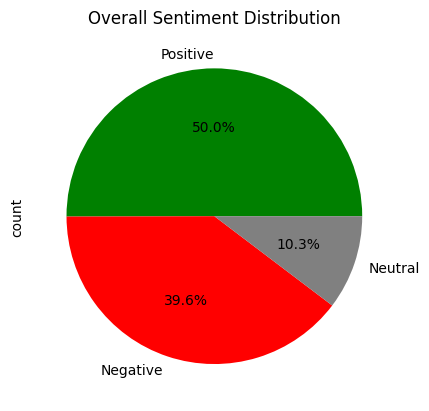

In [14]:
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green","red","grey"])
plt.title("Overall Sentiment Distribution")
plt.show()

## Trend over time

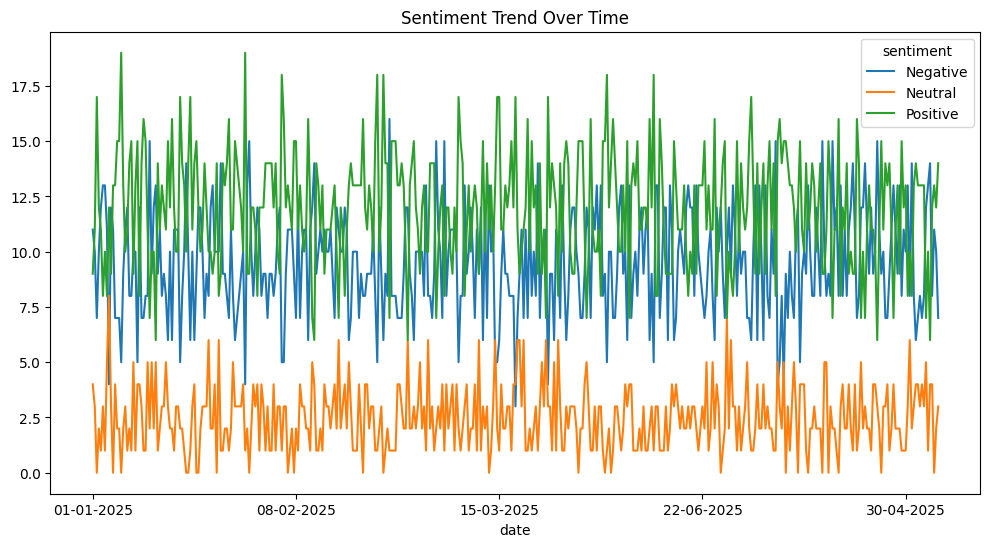

In [15]:

trend = df.groupby([df['date'].str[:10], "sentiment"]).size().unstack().fillna(0)
trend.plot(kind="line", figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.show()

## WordCloud

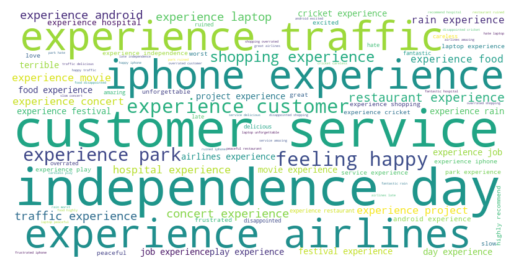

In [16]:
text = " ".join(df["clean_text"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
positive_text = " ".join(df[df['sentiment'] == "Positive"]["clean_text"])

## Positive WordCloud

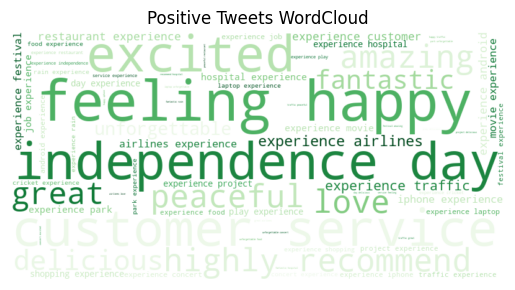

In [18]:
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets WordCloud")
plt.show()

In [19]:
 negative_text = " ".join(df[df['sentiment'] == "Negative"]["clean_text"])

##  Negative WordCloud

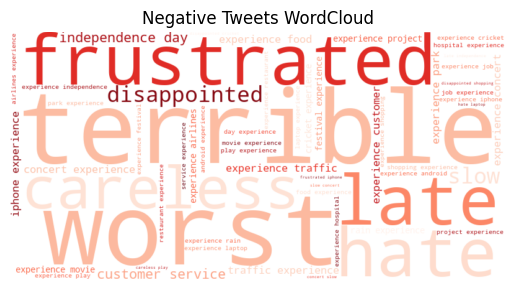

In [20]:
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets WordCloud")
plt.show()